# Mini-Project by Qiaoying Zhang

## Read in Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("2016.csv")

## High Level View

In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [4]:
df.shape

(157, 13)

***
This dataset display the happiness rank of various countries given multiple factors. From looking at the head() of the dataset, we can see that the `Happiness Rank` and `Happiness Score` are in descending order. Since the `Family` numbers are so low, I suppose the Family records the family member other than the surveyed individuals (could be 0 if the individual is unmaried and has no child). Also, the `Health (Life Expectancy)` field is missing common factor (hence, we can make certain prior assumptions eg. Health * 100). Moreover, the dataset is a mix of some numerical fields like "Health" and some categorical fields like "Region". `Freedom` could be a categorical variable where individuals select "1" or "0" if they consider themselves *free*. From the shape and first column - we see that the data has 157 rows which indicates that **not every single country is displayed** (total number of countries in the world: 195). Given the confidence interval, we can compare if the happiness score is the actual mean if we redo the test.
***

## Preliminary Exploration

### 1. Data summarization/statistical analysis

In this section, I explore the numerical values of the dataset. The aim is to get an idea of trends in the dataset using descriptive statics (mean, median etc).

1. Describe - To see dataframe level statistics of numerical fields. From looking at the five number summary (maximum, minimum, the lower and upper quartiles, and the median), I see a relatively normal distribution (possibly right skewed because mean > 50% tile). The spreads of the dataset are relatively small (eg. most countries have similar `Trust`). 
2. Info - To see what is the type of data in each field. We see that most fields are numerical, with only 2 object fields.

Counts are the same for all fields. Therefore, There are **no** null values. However, multiple columns consist of minimum value of 0.

In [5]:
df.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

### 2. Data visualization
In this section, the distribution of country happiness scores is displayed in a histogram form with bins of 25.
    
    There exists a relatively normal distribution with a median/mode ~ 5.2 (possible mode ~ 4.3). 
    Only few countries (~ 1/5 of the dataset) has happiness score less than 4.
    There is no obvious outlier. The span of the graph (bins) is about 0.2.
    The bins from 5.5 to 6 has the most common frequencies.

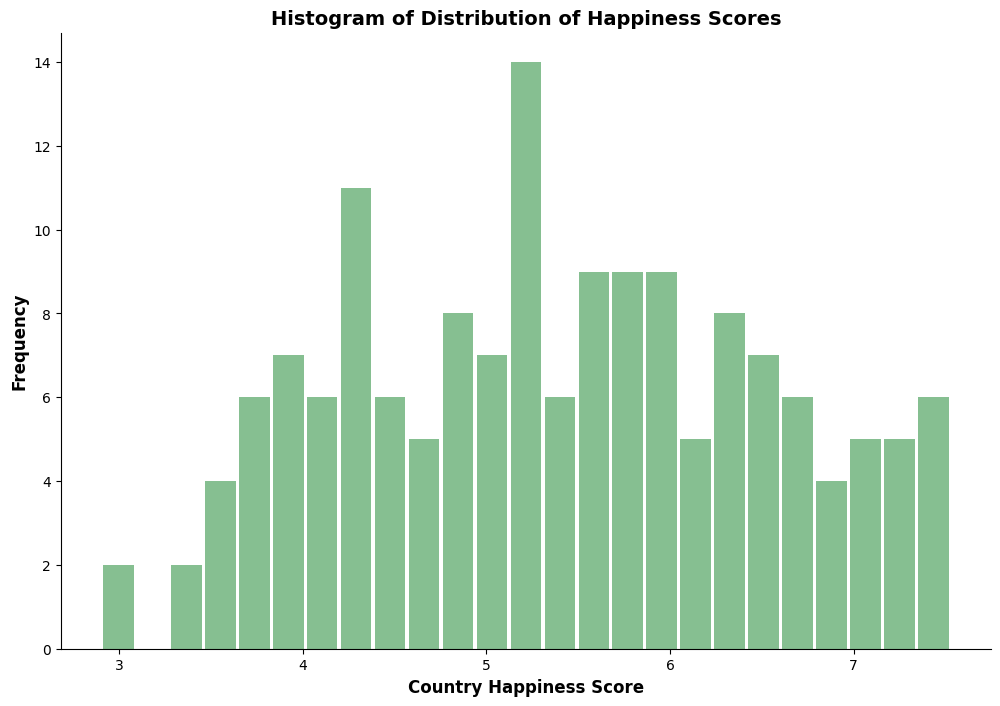

In [7]:
ax = df.hist(column = 'Happiness Score', bins = 25, grid = False, figsize = (12, 8), color = '#86bf91', rwidth = 0.9)

ax = ax[0]
for x in ax:
    x.spines['top'].set_visible(False)
    x.spines['right'].set_visible(False)
    
    x.set_title('Histogram of Distribution of Happiness Scores', weight = 'bold', size = 14)
    x.set_xlabel('Country Happiness Score', weight = 'bold', size = 12)
    x.set_ylabel('Frequency', weight = 'bold', size = 12)

## Defining objectives

**I want to analyze how features like life expectancy, freedom, government corruption, region, and happiness scores affect each other. This will help me better estimate an outcome and understand if multiple fields can together affect the overall happiness score of a country.**

The objectives for the data analysis tasks are -

1. How closely are Life expectancy, Generosity, Family, and Happiness scores related?
2. How are Freedom, Economy, and Happiness scores related to each other? Does one correlation project the other?
3. What are some of the geographies that have higher/lower happiness scores? Can they be aggregated or categorized by region?

## Present Your Findings

In [8]:
# Imports
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

#### a. Analyze how features like Life expectancy, Generosity, Family, and Happiness scores affect each other.
We have several personal related fields available in the dataset. To analyze the effect of one variable on the other, we would need to find the correlation between them. This will be an analysis based on all countries provided in the dataset.

1. Choice of visualization - A correlation heatmap would be an ideal plot for this objective. It provides a color gradient based on strength of correlation and is easy to read.

In [9]:
# filter all the personal related fields
df_filtered = df[['Health (Life Expectancy)', 'Generosity', 'Family', 'Happiness Score']]

2. Plot the graph


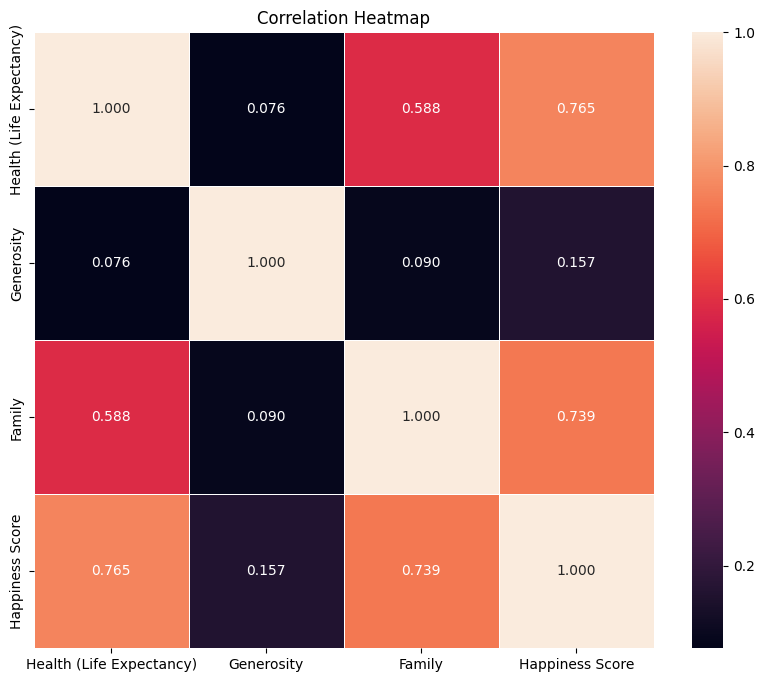

In [10]:
plt.figure(figsize = (10, 8))
plt.title('Correlation Heatmap')
sns.heatmap(df_filtered.corr(), annot = True, fmt = ".3f",  linewidths = 0.5)
plt.show()

3. Inference : The higher the value of correlation, the greater one field affects the other. All correlation values from the heatmap are positive, meaning that variables are directly proportional. From the heatmap, Health and Family are strongly positively correlated to Happiness score(0.765 & 0.739). Thus, generally speaking higher life expectancy and family member count would lead to higher happiness score. Similarly, Generosity is imperceptibly correlated to all the other variables(< 0.1). Therefore, Generosity makes little to none correlation to many personal factors in effect to happiness scores.

#### b. Analyze how features like Freedom and Economy correlated, and how they affect Happiness scores.
We have several personal related fields available in the dataset. To analyze the effect of one variable on the other, we would need to find the correlation between them. This will be an analysis based on all countries provided in the dataset.

1. Choice of visualization - A paire plot of Freedom and Economy based on hue of Happiness Score would be an ideal plot for this objective. It displays (linear) relationship between Freedom and Economy, and showcase the correlation of Happiness Score to these variables.

2. Plot the graph


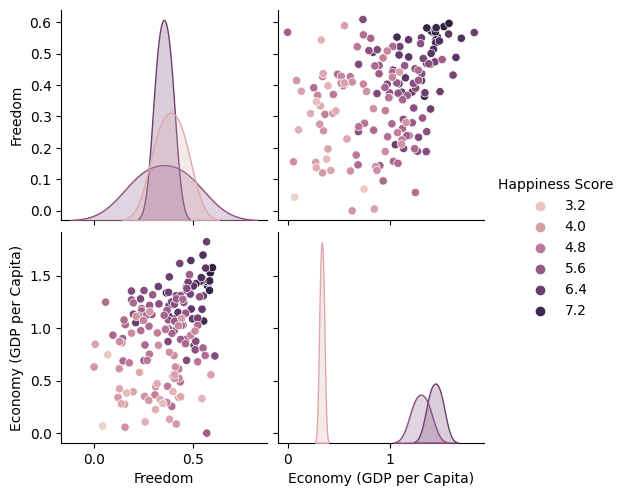

In [11]:
sns.pairplot(df, vars = ['Freedom', 'Economy (GDP per Capita)'], hue = 'Happiness Score')

3. Inference : The Economy and Freedom display an overall linear relationship (positivly correlated). From the distribution plot, numbers are most spread out when happiness score is around 5.6 - 6.4 with a median at freedom around 0.13 or near 0.5 GDP per capita. Fewer countries with higher freedom and happiness score (higher freedom distribution plot has smaller standard deviation). Since higher happiness scores are more concentrated on the top right of Freedom vs. Economy map, we can conclude that Freedom, Economy, and Happiness Score all positively effect each other.

#### c. Identify the geographies that have higher/lower happiness scores.
We have several region related fields available in the dataset. To analyze the effect of one variable on the other, we would need to find the correlation between them. This will be an analysis based on all countries provided in the dataset.

1. Choice of visualization - 2 subplots (histogram and box plot) is displayed to understand happiness score trends by region. It provides an overview of the regional distribution and how spread out their happiness scores are. The box plot also depict the happiness score quantiles of every region.

2. Plot the graph


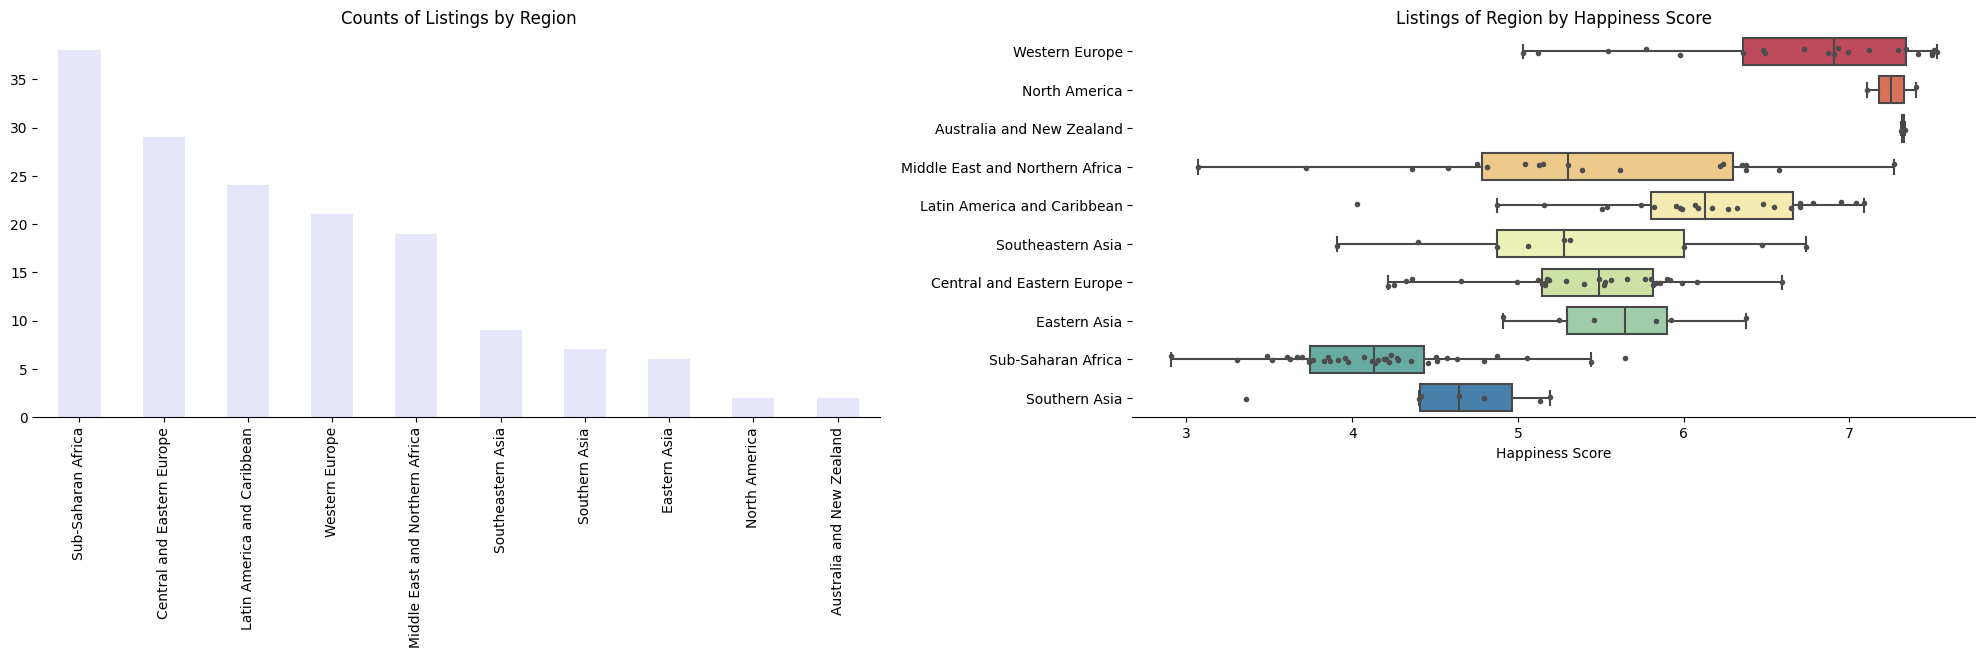

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(25, 5))

# Plot the region counts with histogram
region_count = df.Region.value_counts()
region_count.plot(ax = axes[0], kind = 'bar', facecolor = 'lavender', title = 'Counts of Listings by Region')

# Plot the regional happiness score with horizontal boxes
sns.boxplot(ax = axes[1], x = 'Happiness Score', y = 'Region', data = df, width = .7, palette = 'Spectral', showfliers = False)

# Add in points to show each observation
sns.stripplot(x = 'Happiness Score', y = 'Region', data = df, size = 4, color = '.3')

# set title and axis labels for box plot
axes[1].set_title('Listings of Region by Happiness Score')
axes[1].set(ylabel = '')

# Tweak the visual presentation
plt.subplots_adjust(wspace = 0.3)
sns.despine(left = True)

3. Inference : The two small regions (North America, Australia and New Zealand) has an overall higher happiness scores, while the most popular region (Sub-Saharan Africa) has the overall lowest happiness scores median. The Middle East and Northern Africa has medium popularity but its happiness score are most spread out with a interquartile range of ~ 4. The Central and Eastern Europe and Latin America and Caribbean has an overall average happiness score (5.5 and 6.1) with high population. I personally think that Estern Europe has the most happiness score vs. population ratio by comparison.

## Ethics

Although the dataset and the the analysis performed itself does not have any direct ethical concerns. However, in a broader context accessibility to such kind of data could be an ethical concerns. We cannot be confident that features like 'freedom' and 'trust' be represented numerically because there are multiple political parties and bias exists when one objects to their current government (eg. republic and democratic are two extremes). Another concern could be the verification of this data by authorities, such that what is the resource for data like 'Economy' and 'Dystopia Residual'. Lastly, how is 'generosity' being measured; it would be unethical if the field consist fraud.